### National Basketball Association

#### 2016 - 2017 season

In [92]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import os,re
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200)
pd.set_option("display.max_rows",500)

In [65]:
dfNba = pd.read_csv("../../text_files/sbro/nba/nba_2016_sbro_massey_tr.txt")

In [66]:
dfNba.columns.tolist()

['date',
 'team1',
 'team1 encode',
 'team1 ha',
 'team1 ha encode',
 'team1 1st quarter',
 'team1 2nd quarter',
 'team1 3rd quarter',
 'team1 4th quarter',
 'team1 final score',
 'team1 game result',
 'team1 game result encode',
 'team1 open spread',
 'team1 open spread result',
 'team1 open spread result encode',
 'team1 close spread',
 'team1 close spread result',
 'team1 close spread result encode',
 'team1 american odds',
 'team1 probability odds',
 'team1 decimal odds',
 'team1 fractional odds',
 'team1 win',
 'team1 loss',
 'team1 record rating',
 'team1 rating rank',
 'team1 rating rating',
 'team1 power rank',
 'team1 power rating',
 'team1 offense rank',
 'team1 offense rating',
 'team1 defense rank',
 'team1 defense rating',
 'team1 home field advantage',
 'team1 schedule rank number',
 'team1 schedule rank decimal',
 'team1 conference',
 'team1 conference encode',
 'team1 assists',
 'team1 defensive rebounds',
 'team1 field goals attempted',
 'team1 fouls',
 'team1 offensiv

In [67]:
dfNba.head(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,1025,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,1025,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,1025,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,1026,Miami Heat,16,away,0,23,27,30,28,108,win,1,4.0,win,1,3.0,w

### Parsing dates

In [68]:
def parseDate(df):
    for index,x in enumerate(df["date"]):
        if (int(x) > 900 and int(x) < 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["date"].iloc[index] = month + "/" + day + "/" + "2016"
            print("changed: %s" % df["date"].iloc[index])
        # following year from January to June
        elif (int(x) < 900):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2017"
            
    # return df

In [69]:
parseDate(dfNba).tail(50)

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


changed: 10/25/2016
changed: 10/25/2016
changed: 10/25/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016


AttributeError: 'NoneType' object has no attribute 'tail'

In [70]:
dfNba.tail(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
1258,4/23/2017,Los Angeles Clippers,13,away,0,26,26,28,18,98,loss,0,1.0,loss,0,5.0,loss,0,185,35.09,2.85,1.8500,54,35,0.607,6,0.64,5,3.82,6,108.32,12,1.10,2.37,8,1.30,pacific,4,22.2,33.7,82.7,19.9,8.9,103.9,107.8,93.7,91,108.3,107.3,3.9,-4.0,-13,7.8,-0.2,27.1,Utah Jazz,29,home,1,24,31,22,28,105,win,1,-1.0,win,1,-5.0,win,1,-215,68.25,1.47,0.4651,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,198.0,over,1,196.0,over,1,2016
1259,4/24/2017,Milwaukee Bucks,17,away,0,20,28,25,20,93,loss,0,6.5,loss,0,6.0,loss,0,200,33.33,3.00,2.0000,44,44,0.500,16,-0.17,16,-0.70,28,100.77,5,4.12,2.73,21,0.53,central,2,24.0,31.5,81.6,20.3,8.8,103.1,102.9,86.0,89,104.9,100.9,-0.2,-13.0,-3,2.6,-3.1,23.6,Toronto Raptors,28,home,1,31,26,33,28,118,win,1,-6.5,win,1,-6.0,win,1,-240,70.59,1.42,0.4167,55,37,0.598,9,0.35,10,0.85,21,102.89,6,3.55,2.69,19,0.69,atlantic,1,18.6,32.6,83.8,20.8,10.2,102.6,105.8,99.7,102,109.8,101.7,3.1,-16.7,-7,6.6,-0.4,24.2,192.5,over,1,193.0,over,1,2016
1260,4/24/2017,Washington Wizards,30,away,0,35,15,27,24,101,loss,0,3.0,loss,0,2.5,loss,0,120,45.45,2.20,1.2000,56,39,0.589,8,0.47,12,0.68,5,109.45,25,-3.18,3.61,30,0.24,southeast,5,23.7,32.5,87.1,21.5,10.4,107.5,109.0,99.3,105,110.3,107.8,1.6,-10.3,-10,5.7,-2.5,25.0,Atlanta Hawks,1,home,1,28,31,18,34,111,win,1,-3.0,win,1,-2.5,win,1,-140,58.33,1.71,0.7143,45,43,0.511,17,-0.25,18,-1.07,22,102.65,10,1.87,3.19,29,0.31,southeast,5,23.5,34.0,84.4,18.4,10.4,104.2,103.3,103.0,99,106.1,100.5,-0.9,-3.3,-16,0.4,-2.1,26.1,211.5,over,1,213.0,under,0,2016
1261,4/24/2017,Golden State Warriors,10,away,0,45,2

### Restrict target

In [71]:
dfFilterNba = dfNba[(dfNba["team1 final score"] > 60) & (dfNba["team2 final score"] > 60)]

In [72]:
# dallasDf["Date"] = pd.to_datetime(dallasDf['Date'])
# dallasDf.set_index('Date',inplace=True)
# dallasDf.index

In [85]:
features = [
#     'date',
#     'team1',
    'team1 encode',
#     'team1 ha',
    'team1 ha encode',
#     'team1 1st quarter',
#     'team1 2nd quarter',
#     'team1 3rd quarter',
#     'team1 4th quarter',
    'team1 final score',
#     'team1 game result',
#     'team1 game result encode',
    'team1 open spread',
#     'team1 open spread result',
#     'team1 open spread result encode',
    'team1 close spread',
#     'team1 close spread result',
#     'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
#     'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
#     'team2',
    'team2 encode',
#     'team2 ha',
    'team2 ha encode',
#     'team2 1st quarter',
#     'team2 2nd quarter',
#     'team2 3rd quarter',
#     'team2 4th quarter',
#     'team2 final score',
#     'team2 game result',
#     'team2 game result encode',
    'team2 open spread',
#     'team2 open spread result',
#     'team2 open spread result encode',
    'team2 close spread',
#     'team2 close spread result',
#     'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
#     'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
#     'open total result',
#     'open total result encode',
    'close total']
#     'close total result',
#     'close total result encode',
#     'year'



In [74]:
dfNba["date"].sample(155)

816      2/12/2017
829      2/13/2017
592      1/13/2017
1054     3/21/2017
864      2/24/2017
311     12/05/2016
175     11/18/2016
717      1/30/2017
1068     3/23/2017
337     12/09/2016
495     12/30/2016
1290     5/10/2017
903      3/01/2017
1224     4/12/2017
164     11/16/2016
811      2/11/2017
265     11/30/2016
322     12/07/2016
1132     3/31/2017
1006     3/15/2017
50      11/01/2016
1087     3/26/2017
795      2/09/2017
966      3/10/2017
1233     4/16/2017
1241     4/18/2017
1035     3/19/2017
131     11/12/2016
569      1/10/2017
823      2/13/2017
18      10/28/2016
356     12/11/2016
511      1/02/2017
586      1/12/2017
460     12/26/2016
83      11/05/2016
641      1/20/2017
778      2/07/2017
255     11/28/2016
1097     3/27/2017
922      3/04/2017
1153     4/04/2017
621      1/17/2017
1181     4/07/2017
822      2/13/2017
392     12/16/2016
785      2/08/2017
194     11/20/2016
1270     4/28/2017
731      2/01/2017
954      3/08/2017
482     12/28/2016
923      3/0

In [75]:
dfNba.set_index(["date"])

,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10/25/2016,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
10/25/2016,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
10/25/2016,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,1

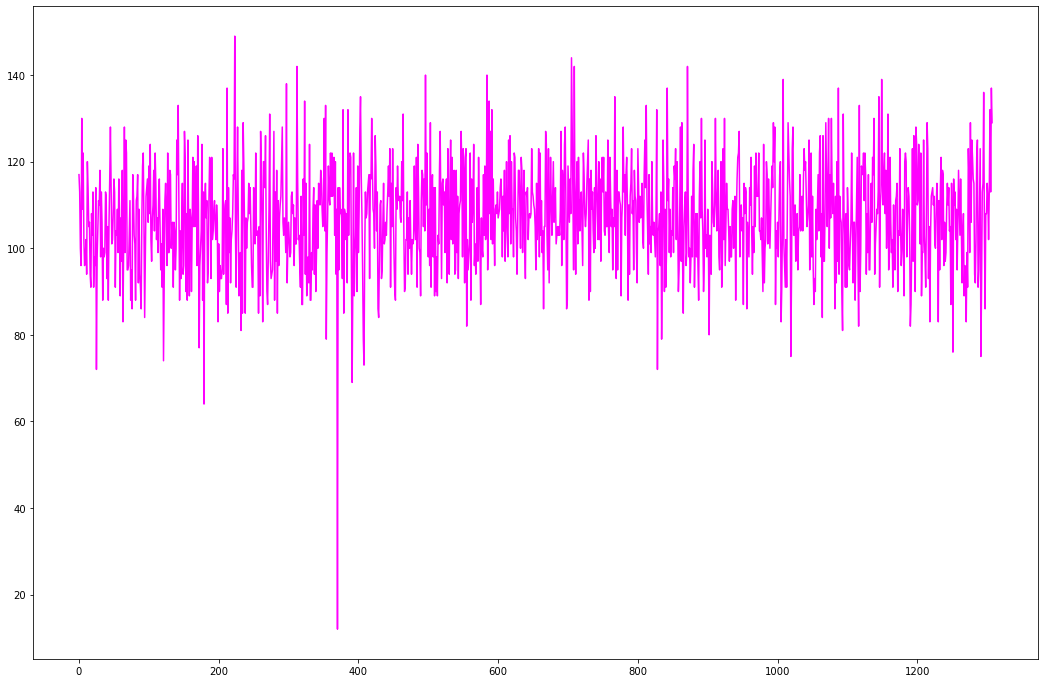

In [76]:
plt.figure(figsize=(18,12))
# plt.plot(nbaDf.index,nbaDf["team1 final score"],color="green")
plt.plot(dfNba.index,dfNba["team2 final score"],color="magenta")
plt.show()

In [77]:
dfNbaScore = dfNba[(dfNba["team1 final score"] > 60) \
    & (dfNba["team2 final score"] > 60)]

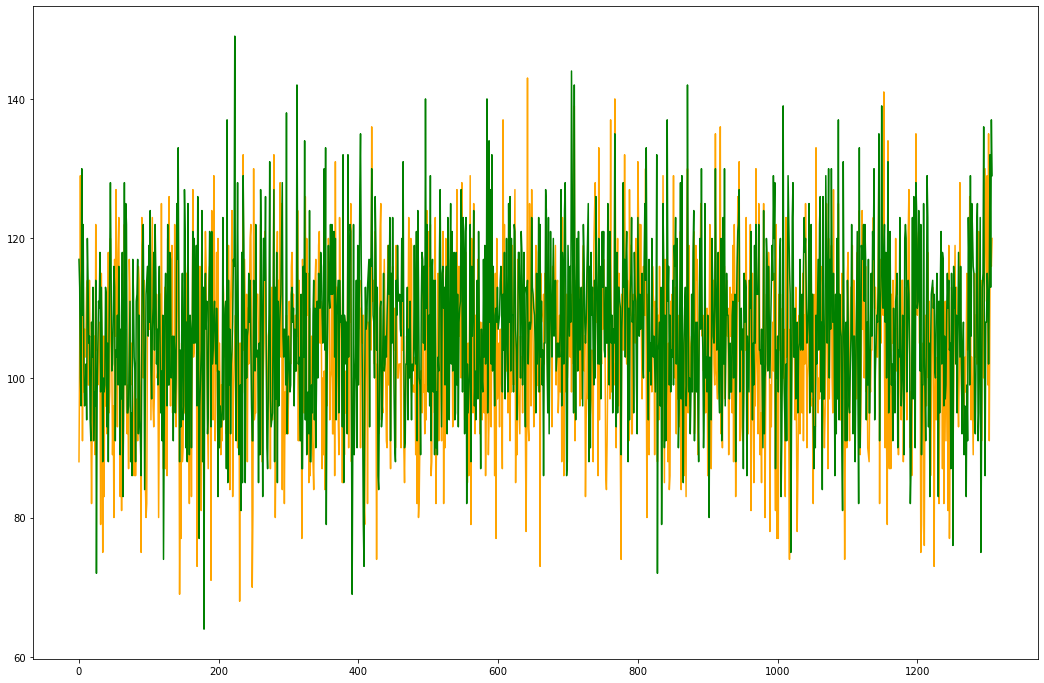

In [78]:
plt.figure(figsize=(18,12))
plt.plot(dfNbaScore.index,dfNbaScore["team1 final score"],color="orange")
plt.plot(dfNbaScore.index,dfNbaScore["team2 final score"],color="green")
plt.show()

### Train, test, split

In [95]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[features],dfFilterNba["team1 final score"], \
    test_size=0.25,random_state=14)

In [96]:
scalerX = StandardScaler()
scalerX.fit(xTrain)
xTrainScaled = scalerX.transform(xTrain)
xTestScaled = scalerX.transform(xTest)

In [97]:
XGBRegressor = xgb.XGBRegressor(booster="gbtree",objective="reg:squarederror",learning_rate=0.9111,
    max_depth=6,alpha=1,n_estimators=211,reg_lambda=0.09999,reg_alpha=2.2222)

In [98]:
XGBRegressor.fit(xTrainScaled,yTrain)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9111, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=211, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=2.2222, reg_lambda=0.09999, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [100]:
yPredict = XGBRegressor.predict(xTestScaled)
pd.DataFrame(yPredict).head(255)

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,0
0,105.171104
1,107.031769
2,86.880638
3,94.282333
4,108.021423
5,105.036201
6,112.122826
7,85.520882
8,98.095596
9,108.973564


In [101]:
meanAbsoluteError = mean_absolute_error(yTest,yPredict)
print("mean absolute error (team1 final score): %s" % meanAbsoluteError)
meanSquaredError = mean_squared_error(yTest,yPredict)
print("mean squared error (team1 final score): %s" % meanSquaredError)

mean absolute error (team1 final score): 0.21277133113382787
mean squared error (team1 final score): 0.150704241436956
